# Problem 2

## Agenda
- Problem Description
- Problem Implementation
- Alternative Problems
- Wrap-Up

## Problem Description
- <b>Consider a grid of N buses to which generators and loads are connected, and discover a grid loss function based on M per-bus power injection readings and the corresponding M total grid loss measurements.<b>

    _______________________________________________________________________________________________________________________

Considered "Kite" 5 Bus Network
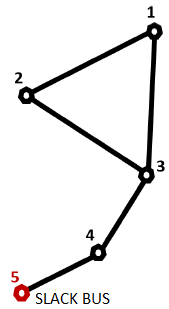

- <b>Implementation.<b>
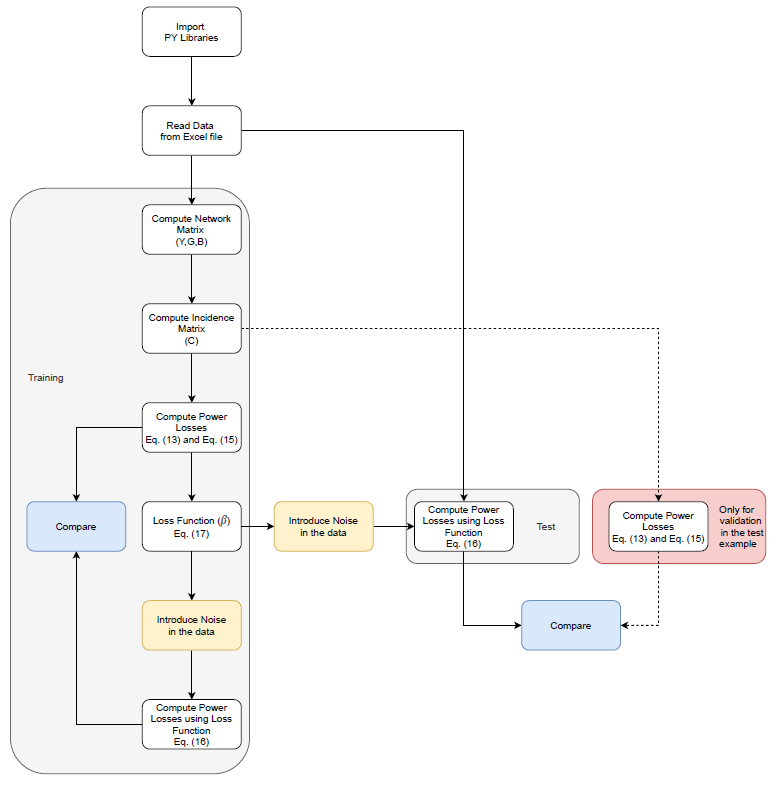

<b>Import Python Libraries

In [265]:
import pandas as pd
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt


<b>Parameters

In [266]:
noiseFactor=0.0025     #noise
networkFactor=100      #to change the characteristics of the network (Y)
PtestFactor=3          #to obtain losses similar to the training data;

<b>Import data (From Excel file)

In [267]:
Info = np.array(pd.read_excel (r'DASG_Prob2_new.xlsx', sheet_name='Info', header=None))
# Information about the slack bus
SlackBus=Info[0,1]
print ("Slack Bus: ", SlackBus,"\n")

# Network Information
Net_Info = np.array(pd.read_excel (r'DASG_Prob2_new.xlsx', sheet_name='Y_Data'))
print ("Lines information (Admitances)\n", Net_Info, "\n")

#Power Information (train)
Power_Info = np.array(pd.read_excel (r'DASG_Prob2_new.xlsx', sheet_name='Load(t,Bus)'))
Power_Info = np.delete(Power_Info,[0],1)
print ("Power consumption information (time, Bus) - (Train)\n", Power_Info, "\n")

#Power Information (test)
Power_Test = np.array(pd.read_excel (r'DASG_Prob2_new.xlsx', sheet_name='Test_Load(t,Bus)'))
Power_Test = np.delete(Power_Test,[0],1)
print ("Power consumption information (time, Bus) - (Test)\n", Power_Test)

time=Power_Info.shape[0]
P=Power_Info
Ptest=Power_Test *PtestFactor  #Power over time

Slack Bus:  5 

Lines information (Admitances)
 [[1 2 '0,01-0,1i']
 [1 3 '0,02-0,2i']
 [2 3 '0,03-0,2i']
 [3 4 '0,03-0,2i']
 [4 5 '0,02-0,2i']] 

Power consumption information (time, Bus) - (Train)
 [[0.332 0.064 0.084 0.12 ]
 [0.236 0.164 0.276 0.064]
 [0.224 0.708 1.572 0.072]
 [0.36  3.44  1.188 0.18 ]
 [1.332 2.176 0.484 1.464]
 [1.516 3.02  0.316 0.624]
 [0.92  0.916 0.404 2.772]
 [0.752 0.64  0.396 1.464]
 [1.828 0.684 0.576 0.576]
 [3.568 0.564 0.828 0.428]
 [0.78  0.356 0.728 0.348]
 [0.856 0.22  0.308 0.12 ]
 [0.684 0.528 0.256 0.44 ]] 

Power consumption information (time, Bus) - (Test)
 [[0.18  0.06  0.188 0.132]
 [0.1   0.06  0.992 0.132]
 [0.388 0.1   1.576 0.132]
 [0.28  0.196 0.08  1.94 ]
 [0.5   0.184 0.064 0.572]
 [1.16  0.108 0.064 0.188]
 [1.036 0.06  0.068 0.08 ]
 [1.036 0.064 0.112 0.064]
 [1.768 0.064 0.2   0.068]
 [0.804 0.092 0.184 0.064]
 [0.824 0.196 0.088 0.096]
 [0.52  0.188 0.064 0.196]
 [0.184 0.104 0.068 0.192]]


<b>Admittance Matrix(Y); Conductance Matrix(G); Susceptance Matrix(B)

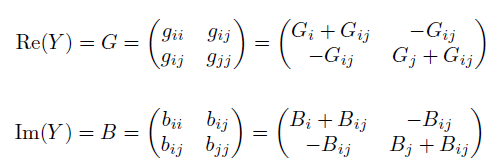

In [268]:
# Determine the number of Bus
nBus=max(np.max(Net_Info[:,0]),np.max(Net_Info[:,1]))

# Create the variable number of lines and the admitance matrix (Y)
nLines=Net_Info.shape[0]

Y=np.zeros((nBus,nBus), dtype=complex)

#Complete the Y matrix nad update the number of lines
for i in range (Net_Info.shape[0]):
    y_aux=Net_Info[i,2].replace(",",".")
    y_aux=y_aux.replace("i","j")
    Y[Net_Info[i,0]-1,Net_Info[i,0]-1]=Y[Net_Info[i,0]-1,Net_Info[i,0]-1]+complex(y_aux)*networkFactor
    Y[Net_Info[i,1]-1,Net_Info[i,1]-1]=Y[Net_Info[i,1]-1,Net_Info[i,1]-1]+complex(y_aux)*networkFactor
    Y[Net_Info[i,0]-1,Net_Info[i,1]-1]=Y[Net_Info[i,0]-1,Net_Info[i,1]-1]-complex(y_aux)*networkFactor
    Y[Net_Info[i,1]-1,Net_Info[i,0]-1]=Y[Net_Info[i,1]-1,Net_Info[i,0]-1]-complex(y_aux)*networkFactor

            
# Remove the slack bus from the admitance matrix            
Yl=np.delete(Y, np.s_[SlackBus-1], axis=0)
Yl=np.delete(Yl, np.s_[SlackBus-1], axis=1)

# Conductance Matrix
G=Yl.real

# Susceptance Matrix
B=Yl.imag 
print("The admitance matrix Y is:\n", Y, "\n")
print("The conductance matrix G is\n", G, "\n")
print("The susceptance matrix B is\n",B, "\n")


The admitance matrix Y is:
 [[ 3.-30.j -1.+10.j -2.+20.j  0. +0.j  0. +0.j]
 [-1.+10.j  4.-30.j -3.+20.j  0. +0.j  0. +0.j]
 [-2.+20.j -3.+20.j  8.-60.j -3.+20.j  0. +0.j]
 [ 0. +0.j  0. +0.j -3.+20.j  5.-40.j -2.+20.j]
 [ 0. +0.j  0. +0.j  0. +0.j -2.+20.j  2.-20.j]] 

The conductance matrix G is
 [[ 3. -1. -2.  0.]
 [-1.  4. -3.  0.]
 [-2. -3.  8. -3.]
 [ 0.  0. -3.  5.]] 

The susceptance matrix B is
 [[-30.  10.  20.   0.]
 [ 10. -30.  20.   0.]
 [ 20.  20. -60.  20.]
 [  0.   0.  20. -40.]] 



<b>Incidence Matrix (Bus,Lines)

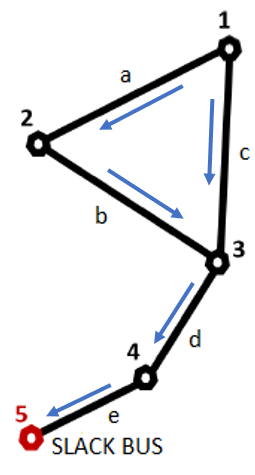

In [269]:
# Create the vectors
C=np.zeros((nBus,nLines))
nLine_Aux=0

# Determine the Incidence Matrix
for i in range (Y.shape[0]):
    for j in range (i+1,Y.shape[1]):
        if np.absolute(Y[i,j])!=0:
            C[i,nLine_Aux]=1
            C[j,nLine_Aux]=-1
            nLine_Aux=nLine_Aux+1           

#Remove the slack bus from the matrix
Cl=np.delete(C, np.s_[SlackBus-1], axis=0)

print ("The incidence matrix C (nBus,nLines) is:\n",Cl)

The incidence matrix C (nBus,nLines) is:
 [[ 1.  1.  0.  0.  0.]
 [-1.  0.  1.  0.  0.]
 [ 0. -1. -1.  1.  0.]
 [ 0.  0.  0. -1.  1.]]


<b>Definition of Matrix Gij (Diagonal and vector)

In [270]:
# Create the vectors
Gv=np.zeros((1,nLines))
Gd=np.zeros((nLines,nLines))
nLine_Aux=0

# Determine the Incidence Matrix
for i in range (Y.shape[0]):
    for j in range (i+1,Y.shape[1]):
        if np.absolute(Y[i,j])!=0:
            Gv[0,nLine_Aux]=-np.real(Y[i,j])          #Information about the lines condutance [Vector]
            Gd[nLine_Aux,nLine_Aux]=-np.real(Y[i,j])  #Information about the lines condutance [Diagonal in matrix]
            nLine_Aux=nLine_Aux+1           


print ("Gij_Diag:\n",Gd)

Gij_Diag:
 [[1. 0. 0. 0. 0.]
 [0. 2. 0. 0. 0.]
 [0. 0. 3. 0. 0.]
 [0. 0. 0. 3. 0.]
 [0. 0. 0. 0. 2.]]


<b>Definition of the Power Losses in two different ways, following equations (13) and (15) of lectures.

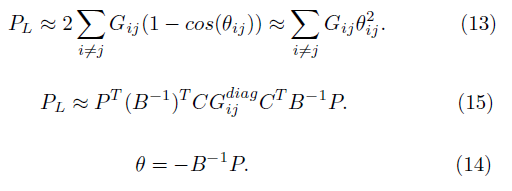

In [271]:
#Matrix creation
teta=np.zeros((nBus-1,time))
grau=np.zeros((nLines,time))
PL=np.zeros((time))
PL2=np.zeros((time))
PT=np.zeros((time))
rLoss=np.zeros((time))

#Losses
alfa=np.dot(np.dot(np.dot(np.dot(np.linalg.inv(B),Cl),Gd),np.transpose(Cl)),np.linalg.inv(B))  #Used in Equation (15)

for m in range (time):
    PL[m]=np.dot(P[m,:],np.dot(alfa,np.transpose(P[m,:])))  #Power Losses using equation (15)
    
    teta[:,m]=np.dot(np.linalg.inv(B),np.transpose(P[m,:])) #Voltage angle (Teta). Equation (14) 

    grau[:,m]=np.dot(np.transpose(Cl),teta[:,m])            #Voltage angle difference (Teta ij)

    PL2[m]=np.dot(2*Gv,1-np.cos(grau[:,m]))                 #Power Losses using equation (13)

    PT[m]=np.sum([P[m,:]])                                  #Total Power   

    rLoss[m]=np.divide(PL2[m],PT[m])                        #Power Losses (%)


PL2_with_noise = PL2 + np.random.normal(0, 0.05, size=(13,)) 

print ("Total Power consumption:\n",PT ,"\n")    
print ("Power Losses obtained using the Theta:\n",PL2 ,"\n")  
print ("Power Losses obtained without using the Theta:\n",PL ,"\n")  

Total Power consumption:
 [0.6   0.74  2.576 5.168 5.456 5.476 5.012 3.252 3.664 5.388 2.212 1.504
 1.908] 

Power Losses obtained using the Theta:
 [0.0040525  0.00665397 0.08342236 0.38413184 0.30832255 0.39635134
 0.17306509 0.08269704 0.15806927 0.38605897 0.05446394 0.02942382
 0.0388501 ] 

Power Losses obtained without using the Theta:
 [0.00405272 0.00665461 0.0835298  0.38592245 0.3096688  0.39823976
 0.1737622  0.08283    0.15840609 0.38795136 0.05450801 0.02943516
 0.0388715 ] 



C:\Users\berna\AppData\Local\Temp\ipykernel_3284\201201287.py:19: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  PL2[m]=np.dot(2*Gv,1-np.cos(grau[:,m]))                 #Power Losses using equation (13)


<b>Discovering the loss function

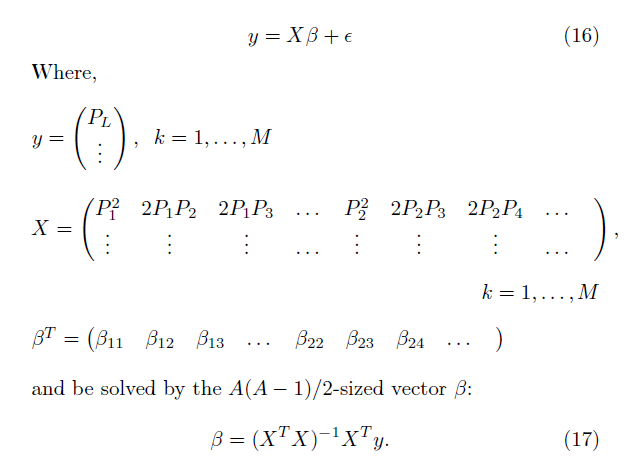

TO BE DONE

In [272]:
print(P)

#Create the X matrix to learn the B vector, that is the cross product of the Ptest.

X=[]


for i in range(13):
    row_i = []  # Initialize a row for the current i

    for j in range(4):
        for k in range(4):
            if j <  k:
                row_i.append(2 * P[i][j] * P[i][k])
            if j == k:
                row_i.append(P[i][j] ** 2)

    X.append(row_i)

X = np.array(X)
    
print("The X matrix is:\n", X)

Beta = np.dot(X.T,X)

print("The B matrix is:\n", Beta)

Beta = np.linalg.inv(Beta)        
Beta = np.dot(Beta,X.T)
Beta = np.dot(Beta,PL2)

print("The Beta vector is:\n", Beta)

Plosses = np.dot(X,Beta)
print("The power losses are:\n", Plosses)






[[0.332 0.064 0.084 0.12 ]
 [0.236 0.164 0.276 0.064]
 [0.224 0.708 1.572 0.072]
 [0.36  3.44  1.188 0.18 ]
 [1.332 2.176 0.484 1.464]
 [1.516 3.02  0.316 0.624]
 [0.92  0.916 0.404 2.772]
 [0.752 0.64  0.396 1.464]
 [1.828 0.684 0.576 0.576]
 [3.568 0.564 0.828 0.428]
 [0.78  0.356 0.728 0.348]
 [0.856 0.22  0.308 0.12 ]
 [0.684 0.528 0.256 0.44 ]]
The X matrix is:
 [[1.1022400e-01 4.2496000e-02 5.5776000e-02 7.9680000e-02 4.0960000e-03
  1.0752000e-02 1.5360000e-02 7.0560000e-03 2.0160000e-02 1.4400000e-02]
 [5.5696000e-02 7.7408000e-02 1.3027200e-01 3.0208000e-02 2.6896000e-02
  9.0528000e-02 2.0992000e-02 7.6176000e-02 3.5328000e-02 4.0960000e-03]
 [5.0176000e-02 3.1718400e-01 7.0425600e-01 3.2256000e-02 5.0126400e-01
  2.2259520e+00 1.0195200e-01 2.4711840e+00 2.2636800e-01 5.1840000e-03]
 [1.2960000e-01 2.4768000e+00 8.5536000e-01 1.2960000e-01 1.1833600e+01
  8.1734400e+00 1.2384000e+00 1.4113440e+00 4.2768000e-01 3.2400000e-02]
 [1.7742240e+00 5.7968640e+00 1.2893760e+00 3.9000

<b>Plot Results (Training)

TO BE DONE

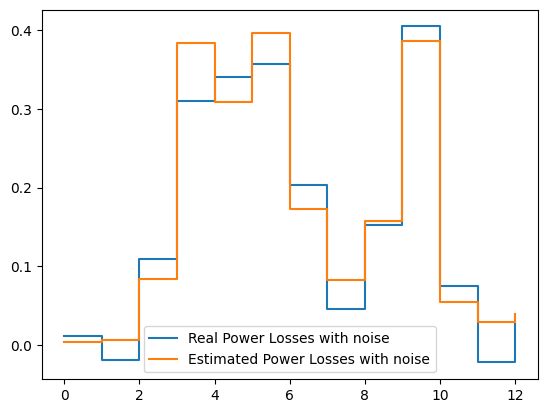

In [273]:
#Plot the results, losses the time
plt.figure()
plt.step(range(len(PL2_with_noise)), PL2_with_noise, label="Real Power Losses with noise", where='post')
plt.step(range(len(Plosses)), Plosses, label="Estimated Power Losses with noise", where='post')
plt.legend()
plt.show()



**Test DataSet**
    
Use Loss Function (Beta Coeficients), to compute the losses considering a new Power Consumption dataset (Ptest). 

In [280]:
#Use Loss Function (Beta Coeficients), to compute the losses considering a new Power Consumption dataset (Ptest).

X_new=[]

for i in range(13):
    row_i = []  # Initialize a row for the current i

    for j in range(4):
        for k in range(4):
            if j <  k:
                row_i.append(2 * Ptest[i][j] * Ptest[i][k])
            if j == k:
                row_i.append(Ptest[i][j] ** 2)

    X_new.append(row_i)

X_new = np.array(X_new)

Losses_final_Ptest = np.dot(X_new,Beta)

print("The estimated Losses are:\n", Losses_final_Ptest)


#Now computing the real losses of Ptest
PL2_test=np.zeros((time))
teta_test=np.zeros((nBus-1,time))
grau_test=np.zeros((nLines,time))
PL_test=np.zeros((time))
PT_test=np.zeros((time))
rLoss_test=np.zeros((time))

alfa_test=np.dot(np.dot(np.dot(np.dot(np.linalg.inv(B),Cl),Gd),np.transpose(Cl)),np.linalg.inv(B))  #Used in Equation (15)

for m in range (time):
    PL_test[m]=np.dot(Ptest[m,:],np.dot(alfa_test,np.transpose(Ptest[m,:])))  #Power Losses using equation (15)
    
    teta_test[:,m]=np.dot(np.linalg.inv(B),np.transpose(Ptest[m,:])) #Voltage angle (Teta). Equation (14) 

    grau_test[:,m]=np.dot(np.transpose(Cl),teta_test[:,m])            #Voltage angle difference (Teta ij)

    PL2_test[m]=np.dot(2*Gv,1-np.cos(grau_test[:,m]))       #Power Losses using equation (13)

    PT_test[m]=np.sum([Ptest[m,:]])                                  #Total Power   

    rLoss_test[m]=np.divide(PL2_test[m],PT_test[m])                        #Power Losses (%)

PL2_test_with_noise = PL2_test + np.random.normal(0, 0.05, size=(13,))
print ("Real Power Losses of Ptest:\n",PL2_test_with_noise ,"\n")



The estimated Losses are:
 [0.02805755 0.16050426 0.49676285 0.30783638 0.12657394 0.27272415
 0.19956481 0.21108283 0.58675929 0.16208857 0.17877139 0.0959254
 0.02419902]
Real Power Losses of Ptest:
 [0.00854137 0.16193501 0.53494487 0.33301247 0.12647741 0.20696289
 0.19298996 0.17710398 0.58401248 0.12101234 0.26321821 0.02850984
 0.05630924] 



C:\Users\berna\AppData\Local\Temp\ipykernel_3284\1314219487.py:41: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  PL2_test[m]=np.dot(2*Gv,1-np.cos(grau_test[:,m]))       #Power Losses using equation (13)


<b>Plot Results (Prediction)

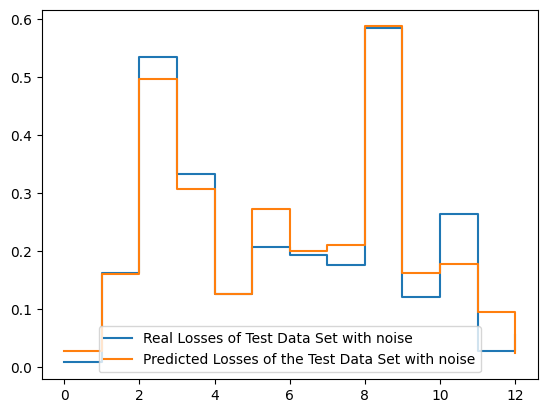

In [282]:
#Plot the results, estimated and the real ones

plt.figure()
plt.step(range(len(PL2_test_with_noise)), PL2_test_with_noise, label="Real Losses of Test Data Set with noise", where='post')
plt.step(range(len(Losses_final_Ptest)), Losses_final_Ptest, label="Predicted Losses of the Test Data Set with noise", where='post')
plt.legend()
plt.show()



# Challenges
Think about an interesting variation to this problem or a different way to solve and implement it !!!

Some ideas:
- Assume the grid is a LV grid and rewrite (16) assuming that angle differences are negligible (only voltage magnitudes differences are expressive). Assume that in LV grids, Bij << Gij.
- Replace the matrix X, in Equation 16, for:\n
    - i) a matrix X' considering the network structure (only use 2.Pi.Pj when a line connection exists). 
    - ii) reducing the dimensionality of X by considering squared injections (Page 33 in the lectures notes) 
    - iii) reducing the dimensionality of X by summing electrically close bus injections before using them as explanatory variables of losses (Page 33 in the lectures notes)
    - Compare with the proposed method in a larger network


The Beta vector is:
 [0.01894261 0.02244389 0.00182769 0.01012871 0.02315047 0.00537795
 0.01854592 0.00649225]
The power losses are:
 [0.00393937 0.0064901  0.08348723 0.38441765 0.30424885 0.39773943
 0.17315516 0.08554942 0.16249776 0.38514557 0.05238166 0.0288991
 0.0405833 ]


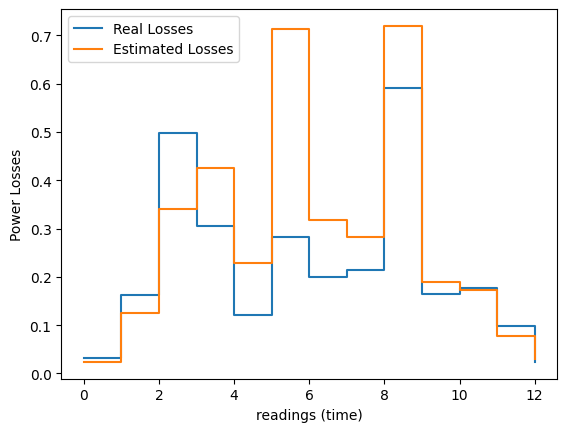

In [276]:
X_new_i=[]
X_test_i=[]

for i in range (13):
    
    X_new_i.append([P[i][0]**2, 2*P[i][0]*P[i][1], 2*P[i][0]*P[i][2], P[i][1]**2, 2*P[i][1]*P[i][2], P[i][2]**2, 2*P[i][2]*P[i][3], P[i][3]**2])

X_new_i = np.array(X_new_i)

for i in range (13):
    
    X_test_i.append([Ptest[i][0]**2, 2*Ptest[i][0]*P[i][1], 2*Ptest[i][0]*Ptest[i][2], Ptest[i][1]**2, 2*Ptest[i][1]*Ptest[i][2], Ptest[i][2]**2, 2*Ptest[i][2]*Ptest[i][3], Ptest[i][3]**2])

X_test_i = np.array(X_test_i)

Betai = np.dot(X_new_i.T,X_new_i)
Betai = np.linalg.inv(Betai)        
Betai = np.dot(Betai,X_new_i.T)
Betai = np.dot(Betai,PL2)

print("The Beta vector is:\n", Betai)

Plosses_i = np.dot(X_new_i,Betai)
print("The power losses are:\n", Plosses_i)

Ptest_losses_i = np.dot(X_test_i,Betai)

#Plot the results, losses the time
plt.figure()
plt.step(range(len(PL2_test_with_noise)), PL2_test_with_noise, label="Real Losses", where='post')
plt.step(range(len(Ptest_losses_i)), Ptest_losses_i, label="Estimated Losses", where='post')
#label the axes
plt.xlabel('readings (time)')
plt.ylabel('Power Losses')
plt.legend()
plt.show()




[[1.1022400e-01 4.0960000e-03 7.0560000e-03 1.4400000e-02]
 [5.5696000e-02 2.6896000e-02 7.6176000e-02 4.0960000e-03]
 [5.0176000e-02 5.0126400e-01 2.4711840e+00 5.1840000e-03]
 [1.2960000e-01 1.1833600e+01 1.4113440e+00 3.2400000e-02]
 [1.7742240e+00 4.7349760e+00 2.3425600e-01 2.1432960e+00]
 [2.2982560e+00 9.1204000e+00 9.9856000e-02 3.8937600e-01]
 [8.4640000e-01 8.3905600e-01 1.6321600e-01 7.6839840e+00]
 [5.6550400e-01 4.0960000e-01 1.5681600e-01 2.1432960e+00]
 [3.3415840e+00 4.6785600e-01 3.3177600e-01 3.3177600e-01]
 [1.2730624e+01 3.1809600e-01 6.8558400e-01 1.8318400e-01]
 [6.0840000e-01 1.2673600e-01 5.2998400e-01 1.2110400e-01]
 [7.3273600e-01 4.8400000e-02 9.4864000e-02 1.4400000e-02]
 [4.6785600e-01 2.7878400e-01 6.5536000e-02 1.9360000e-01]]
The Beta vector is:
 [0.02966568 0.03282725 0.02106678 0.0179685 ]
The power losses are:
 [0.00381172 0.00421356 0.07009667 0.42262389 0.25151664 0.37667714
 0.19416102 0.07203752 0.12743976 0.40583944 0.03555011 0.02558318
 0.02789

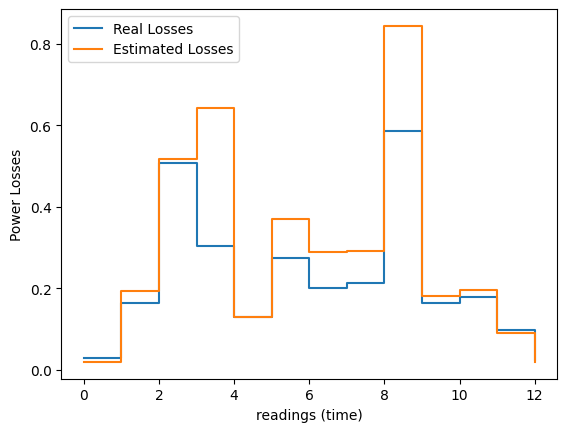

In [277]:
X_new_ii=[]
X_test_ii=[]

for i in range (13):
    
    X_new_ii.append([P[i][0]**2, P[i][1]**2, P[i][2]**2, P[i][3]**2])

X_new_ii = np.array(X_new_ii)

for i in range (13):
    
    X_test_ii.append([Ptest[i][0]**2, Ptest[i][1]**2, Ptest[i][2]**2, Ptest[i][3]**2])

X_test_ii = np.array(X_test_ii)


print(X_new_ii)

Betaii = np.dot(X_new_ii.T,X_new_ii)
Betaii = np.linalg.inv(Betaii)        
Betaii = np.dot(Betaii,X_new_ii.T)
Betaii = np.dot(Betaii,PL2)

print("The Beta vector is:\n", Betaii)

Plosses_ii = np.dot(X_new_ii,Betaii)
print("The power losses are:\n", Plosses_ii)

Ptest_losses_ii = np.dot(X_test_ii,Betaii)

#Plot the results, losses the time
plt.figure()
plt.step(range(len(PL2_test)), PL2_test, label="Real Losses", where='post')
plt.step(range(len(Ptest_losses_ii)), Ptest_losses_ii, label="Estimated Losses", where='post')
plt.xlabel('readings (time)')
plt.ylabel('Power Losses')
plt.legend()
plt.show()



[[2.3040000e-01 1.1520000e-01 1.4400000e-02]
 [4.5697600e-01 8.6528000e-02 4.0960000e-03]
 [6.2700160e+00 3.6057600e-01 5.1840000e-03]
 [2.4880144e+01 1.7956800e+00 3.2400000e-02]
 [1.5936064e+01 1.1688576e+01 2.1432960e+00]
 [2.3541904e+01 6.0552960e+00 3.8937600e-01]
 [5.0176000e+00 1.2418560e+01 7.6839840e+00]
 [3.1969440e+00 5.2352640e+00 2.1432960e+00]
 [9.5357440e+00 3.5573760e+00 3.3177600e-01]
 [2.4601600e+01 4.2457600e+00 1.8318400e-01]
 [3.4744960e+00 1.2973440e+00 1.2110400e-01]
 [1.9154560e+00 3.3216000e-01 1.4400000e-02]
 [2.1550240e+00 1.2918400e+00 1.9360000e-01]]
The Beta vector is:
 [0.01495807 0.00534465 0.00402305]
The power losses are:
 [0.00411997 0.00731442 0.09573532 0.38188645 0.3094666  0.38607125
 0.17233945 0.08442332 0.16298396 0.3914214  0.05939279 0.03048473
 0.03991828]


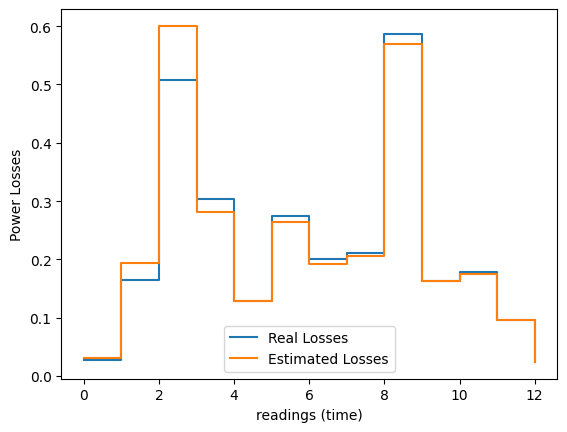

In [278]:
X_new_iii=[]
X_test_iii=[]

for i in range (13):
    
    X_new_iii.append([(P[i][0] + P[i][1] + P[i][2]) ** 2, 2*(P[i][0] + P[i][1] + P[i][2])*P[i][3],  P[i][3]**2])

X_new_iii = np.array(X_new_iii)

for i in range (13):
    
    X_test_iii.append([(Ptest[i][0] + Ptest[i][1] + Ptest[i][2]) ** 2, 2*(Ptest[i][0] + Ptest[i][1] + Ptest[i][2])*Ptest[i][3],  Ptest[i][3]**2])

X_test_iii = np.array(X_test_iii)

print(X_new_iii)

Betaiii = np.dot(X_new_iii.T,X_new_iii)
Betaiii = np.linalg.inv(Betaiii)        
Betaiii = np.dot(Betaiii,X_new_iii.T)
Betaiii = np.dot(Betaiii,PL2)

print("The Beta vector is:\n", Betaiii)

Plosses_iii = np.dot(X_new_iii,Betaiii)
print("The power losses are:\n", Plosses_iii)

Ptest_losses_iii = np.dot(X_test_iii,Betaiii)

#Plot the results, losses the time
plt.figure()
plt.step(range(len(PL2_test)), PL2_test, label="Real Losses", where='post')
plt.step(range(len(Ptest_losses_iii)), Ptest_losses_iii, label="Estimated Losses", where='post')
plt.xlabel('readings (time)')
plt.ylabel('Power Losses')
plt.legend()
plt.show()


#Trade off between what you measure (with some error) and how much you reduce
#Reducing the dimensionality to be computationaly more complex 

# Vector initialization

TO BE DONE. You should compare the three methods considering the test data